In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import os
import glob

average: 0.8246666669845581
average: 0.9000000059604645
average: 0.777999997138977
average: 0.8386666655540467
average: 0.7443333327770233
average: 0.8323333323001861
average: 0.7580000042915345
average: 0.8246666610240936
average: 0.7593333303928376
average: 0.8333333313465119
average: 0.7493333399295807
average: 0.8206666588783265
average: 0.7706666588783264
average: 0.8286666631698608
average: 0.7780000030994415
average: 0.817333334684372
average: 0.7339999973773956
average: 0.831333327293396


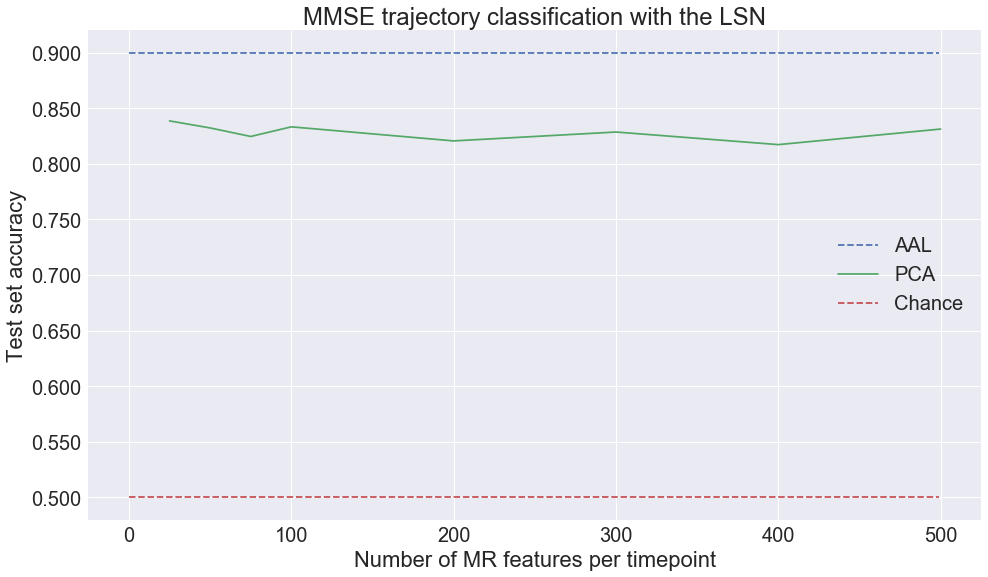

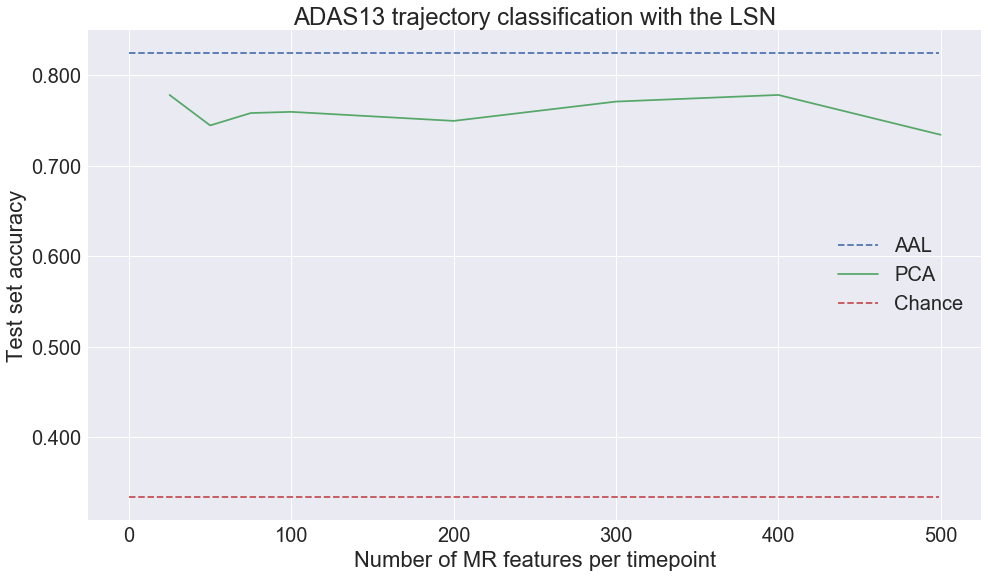

In [77]:
exp_name = "Exp_CL1"
exp_conditions = ["AAL_ADAS13_78", "AAL_MMSE_78",
                  "PCA_ADAS13_25", "PCA_MMSE_25",
                  "PCA_ADAS13_50", "PCA_MMSE_50",
                  "PCA_ADAS13_75", "PCA_MMSE_75",
                  "PCA_ADAS13_100", "PCA_MMSE_100",
                  "PCA_ADAS13_200", "PCA_MMSE_200",
                  "PCA_ADAS13_300", "PCA_MMSE_300",
                  "PCA_ADAS13_400", "PCA_MMSE_400",
                  "PCA_ADAS13_500", "PCA_MMSE_500"]

acc = {'MMSE' : {'AAL': 0, 
                     'PCA': {'x': [], 'y': []}
                    },
           'ADAS13' : {'AAL': 0,
                       'PCA': {'x': [], 'y': []}
                      }
          }

# LSN experiments
for cond in exp_conditions:
    test_acc = []
    for filename in glob.glob("results/{}*test_metrics.pkl".format(cond)):
        test_metrics = pd.read_pickle(filename)
        test_acc.append(test_metrics['test_acc'])
    
    avg_acc = sum(test_acc) / len(test_acc)
    print("average: {}".format(avg_acc))
    exp_info = cond.split("_")
    
    if exp_info[0] == 'AAL':
        acc[exp_info[1]]['AAL'] = avg_acc
    else:
        acc[exp_info[1]][exp_info[0]]['x'].append(int(exp_info[2]))
        acc[exp_info[1]][exp_info[0]]['y'].append(avg_acc)

# Generate plots
for t in acc.keys():
    fig, ax = plt.subplots(figsize=(16,9))
    plt.style.use('seaborn-white')
    sns.set(font_scale=2)
    plt.title("{} trajectory classification with the LSN".format(t))
    plt.xlabel("Number of MR features per timepoint")
    plt.ylabel("Test set accuracy")
    for m in acc[t].keys():
        if m == 'AAL':
            plt.plot(np.tile(acc[t][m],500), '--', label=m)
        else:
            plt.plot(acc[t][m]['x'], acc[t][m]['y'], label=m)
    if t == 'MMSE':
        plt.plot(np.tile(0.5, 500), '--', label="Chance")
    elif t == 'ADAS13':
        plt.plot(np.tile(1.0/3.0, 500), '--', label="Chance")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    plt.legend()
    plt.savefig("plots/{}_{}_test_acc.png".format(exp_name, t))

(2880, 8) (1440, 8) (1440, 8)


/opt/quarantine/anaconda/5.1.0-python3/install/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/quarantine/anaconda/5.1.0-python3/install/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
/opt/quarantine/anaconda/5.1.0-python3/install/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

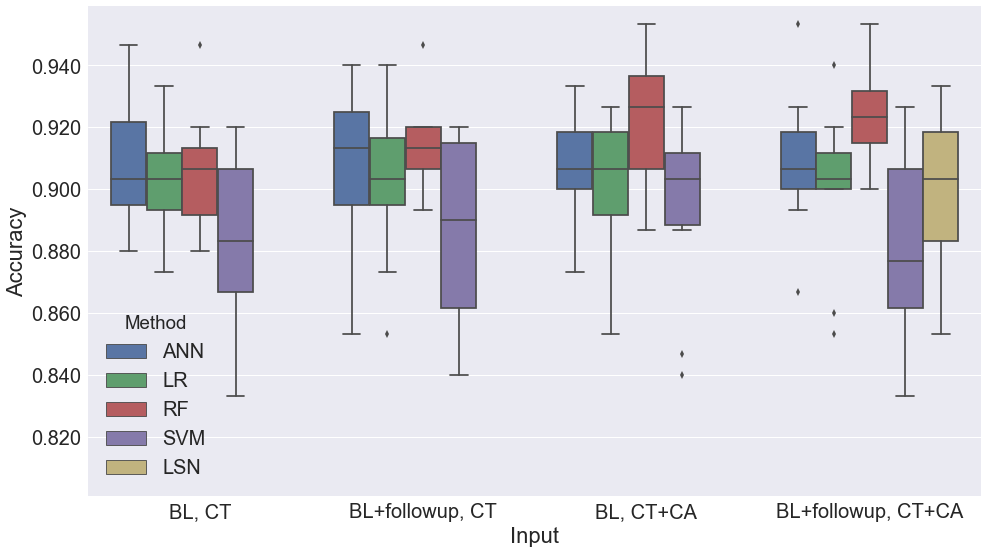

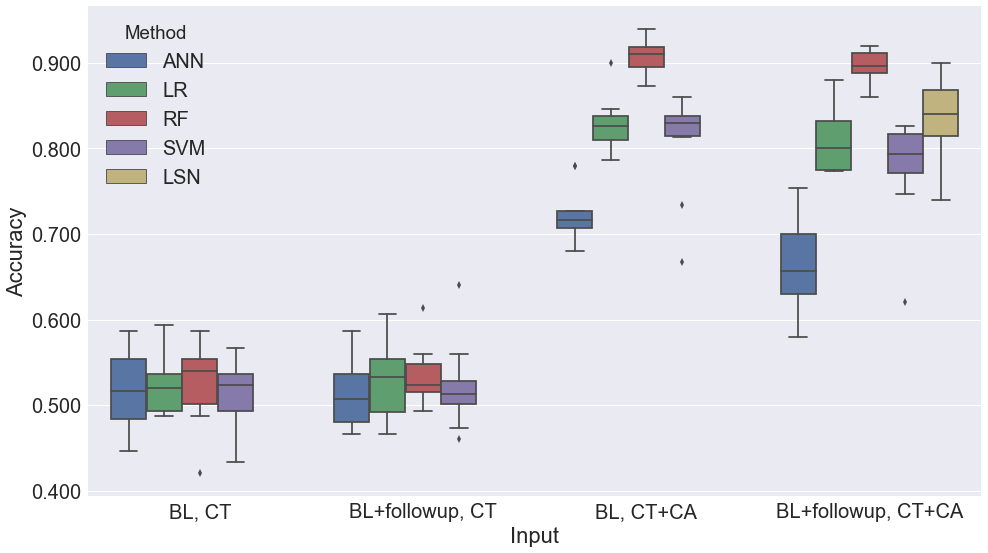

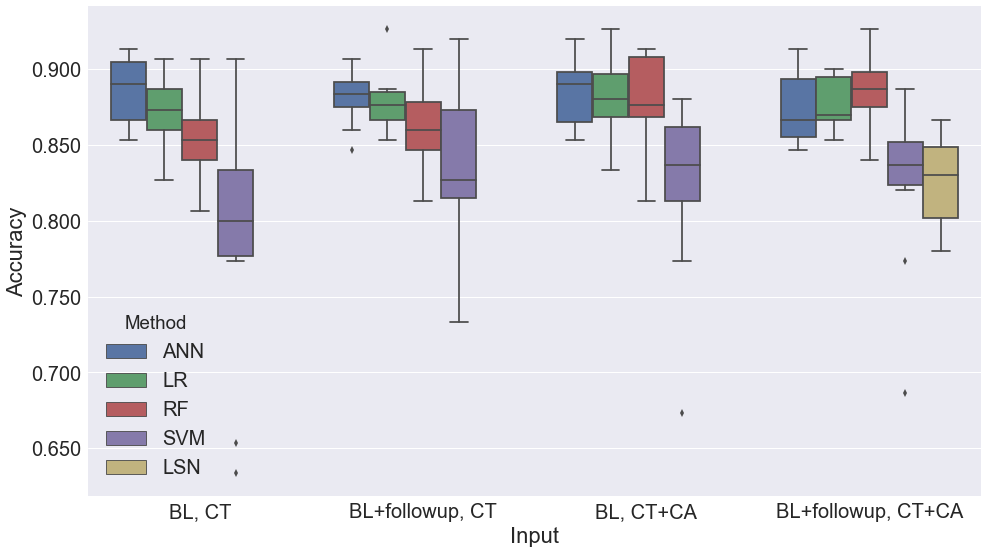

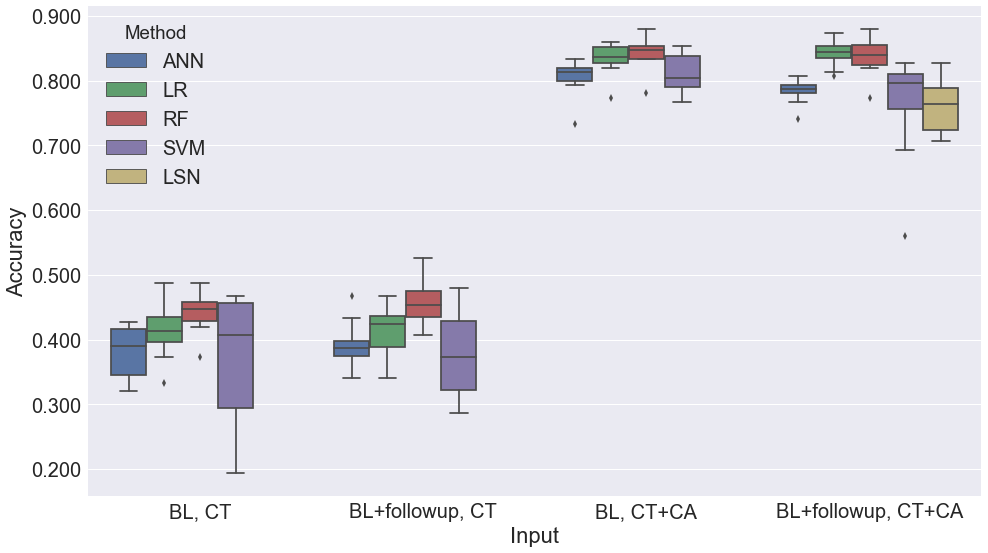

In [117]:
# Baseline experiments
df = pd.read_csv("results/baseline_performance.csv")
mmse = df.loc[df["Trajectory"] == "MMSE"].sort_values("Method")
adas = df.loc[df["Trajectory"] == "ADAS13"].sort_values("Method")
print(df.shape, mmse.shape, adas.shape)

df_lsn = pd.DataFrame()
exp_conditions = ["AAL_ADAS13_78", "AAL_MMSE_78", "PCA_ADAS13_100", "PCA_MMSE_100"]
for cond in exp_conditions:
    test_acc = []
    for filename in glob.glob("results/{}*test_metrics.pkl".format(cond)):
        test_metrics = pd.read_pickle(filename)
        test_acc.append(test_metrics['test_acc'])
    exp_info = cond.split("_")
    new_rows = pd.DataFrame({"Accuracy": test_acc,
                               "FeatureType": exp_info[0],
                               "Trajectory": exp_info[1],
                               "Input": "BL+followup, CT+CA",
                               "Method": "LSN"})
    df_lsn = df_lsn.append(new_rows)

conditions = [
    (df["NoClinical"] == True) & (df["NoFollowup"] == True),
    (df["NoClinical"] == True) & (df["NoFollowup"] == False),
    (df["NoClinical"] == False) & (df["NoFollowup"] == True),
    (df["NoClinical"] == False) & (df["NoFollowup"] == False)]
choices = ["BL, CT", "BL+followup, CT", "BL, CT+CA","BL+followup, CT+CA"]

plt.figure(figsize=(16,9))
df = mmse.loc[mmse["FeatureType"] == "AAL"]
df["Input"] = np.select([
    (df["NoClinical"] == True) & (df["NoFollowup"] == True),
    (df["NoClinical"] == True) & (df["NoFollowup"] == False),
    (df["NoClinical"] == False) & (df["NoFollowup"] == True),
    (df["NoClinical"] == False) & (df["NoFollowup"] == False)], choices)
new_lsn_data = df_lsn.loc[(df_lsn["Trajectory"] == "MMSE") & (df_lsn["FeatureType"] == "AAL")]
df = df.append(new_lsn_data)
ax = sns.boxplot(x="Input", y="Accuracy", hue="Method", data=df, order=choices, )
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_ylim([0.801, 0.959])
plt.savefig("plots/Exp_CL1_MMSE_AAL_acc_boxplot.png")

plt.figure(figsize=(16,9))
df = mmse.loc[(mmse["FeatureType"] == "PCA") & (mmse["NumberOfFeatures"] == 100)]
df["Input"] = np.select([
    (df["NoClinical"] == True) & (df["NoFollowup"] == True),
    (df["NoClinical"] == True) & (df["NoFollowup"] == False),
    (df["NoClinical"] == False) & (df["NoFollowup"] == True),
    (df["NoClinical"] == False) & (df["NoFollowup"] == False)], choices)
new_lsn_data = df_lsn.loc[(df_lsn["Trajectory"] == "MMSE") & (df_lsn["FeatureType"] == "PCA")]
df = df.append(new_lsn_data)
ax = sns.boxplot(x="Input", y="Accuracy", hue="Method", data=df, order=choices)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.savefig("plots/Exp_CL1_MMSE_PCA_acc_boxplot.png")

plt.figure(figsize=(16,9))
df = adas.loc[adas["FeatureType"] == "AAL"]
df["Input"] = np.select([
    (df["NoClinical"] == True) & (df["NoFollowup"] == True),
    (df["NoClinical"] == True) & (df["NoFollowup"] == False),
    (df["NoClinical"] == False) & (df["NoFollowup"] == True),
    (df["NoClinical"] == False) & (df["NoFollowup"] == False)], choices)
new_lsn_data = df_lsn.loc[(df_lsn["Trajectory"] == "ADAS13") & (df_lsn["FeatureType"] == "AAL")]
df = df.append(new_lsn_data)
ax = sns.boxplot(x="Input", y="Accuracy", hue="Method", data=df, order=choices, )
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.savefig("plots/Exp_CL1_ADAS13_AAL_acc_boxplot.png")

plt.figure(figsize=(16,9))
df = adas.loc[(adas["FeatureType"] == "PCA") & (adas["NumberOfFeatures"] == 100)]
df["Input"] = np.select([
    (df["NoClinical"] == True) & (df["NoFollowup"] == True),
    (df["NoClinical"] == True) & (df["NoFollowup"] == False),
    (df["NoClinical"] == False) & (df["NoFollowup"] == True),
    (df["NoClinical"] == False) & (df["NoFollowup"] == False)], choices)
new_lsn_data = df_lsn.loc[(df_lsn["Trajectory"] == "ADAS13") & (df_lsn["FeatureType"] == "PCA")]
df = df.append(new_lsn_data)
ax = sns.boxplot(x="Input", y="Accuracy", hue="Method", data=df, order=choices)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.savefig("plots/Exp_CL1_ADAS13_PCA_acc_boxplot.png")

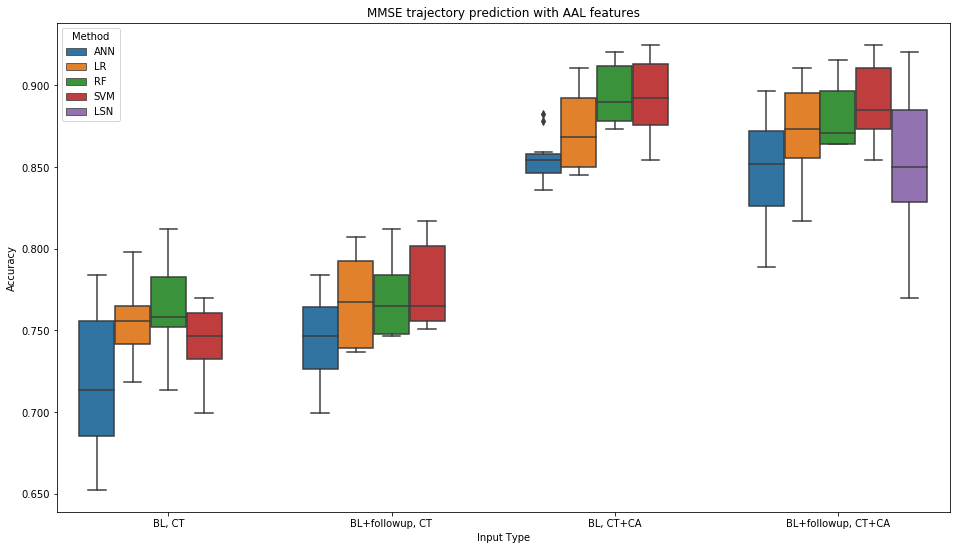

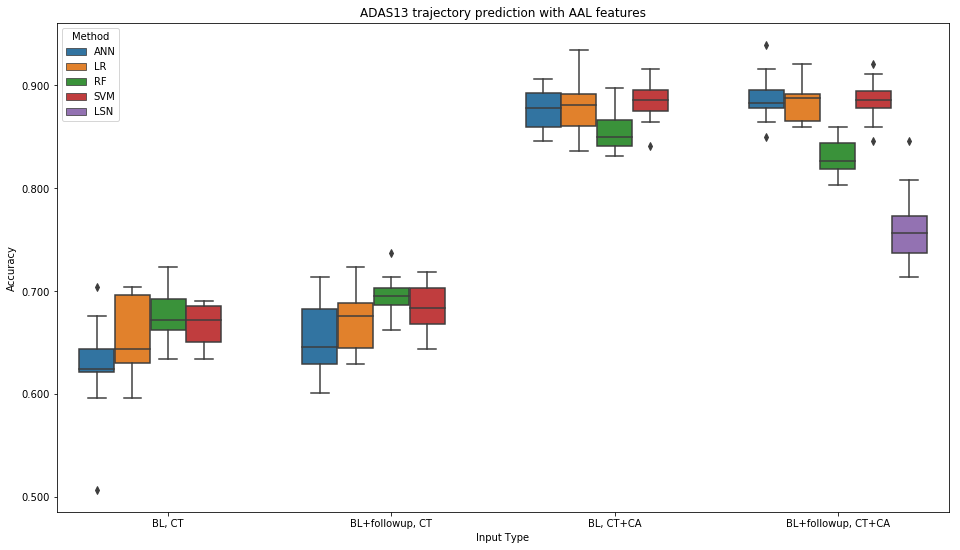

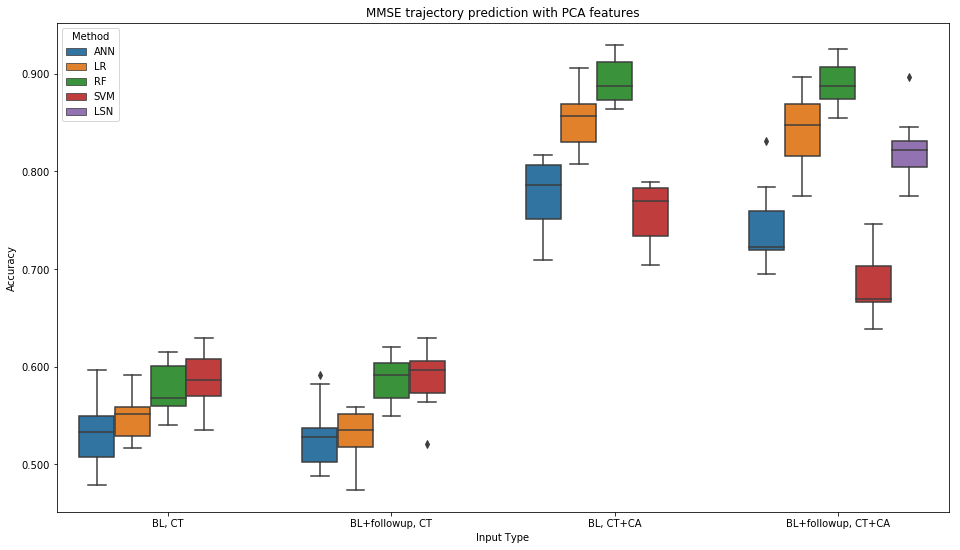

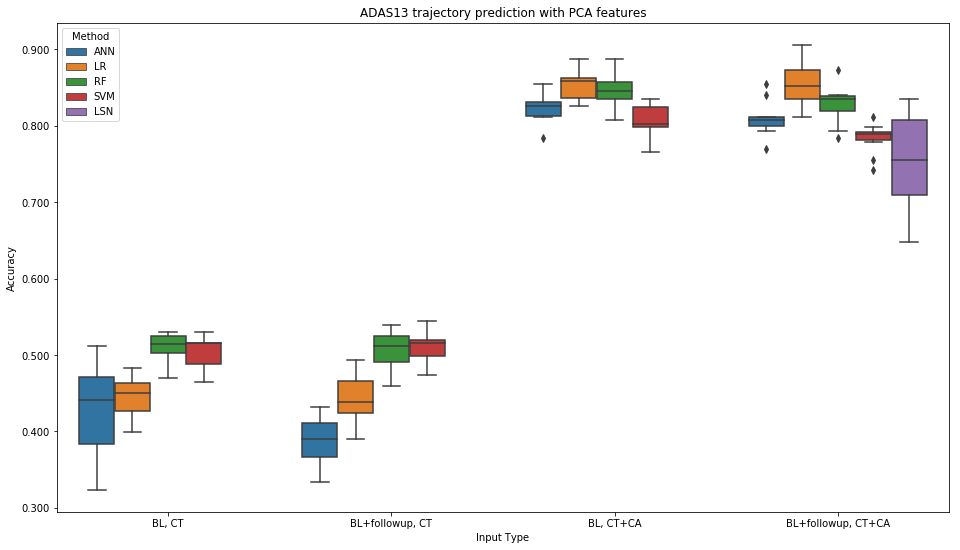

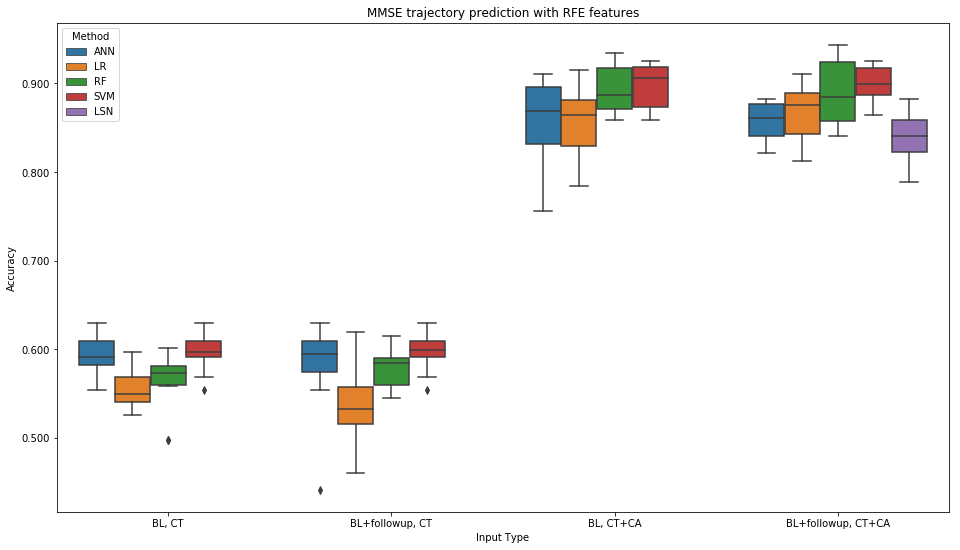

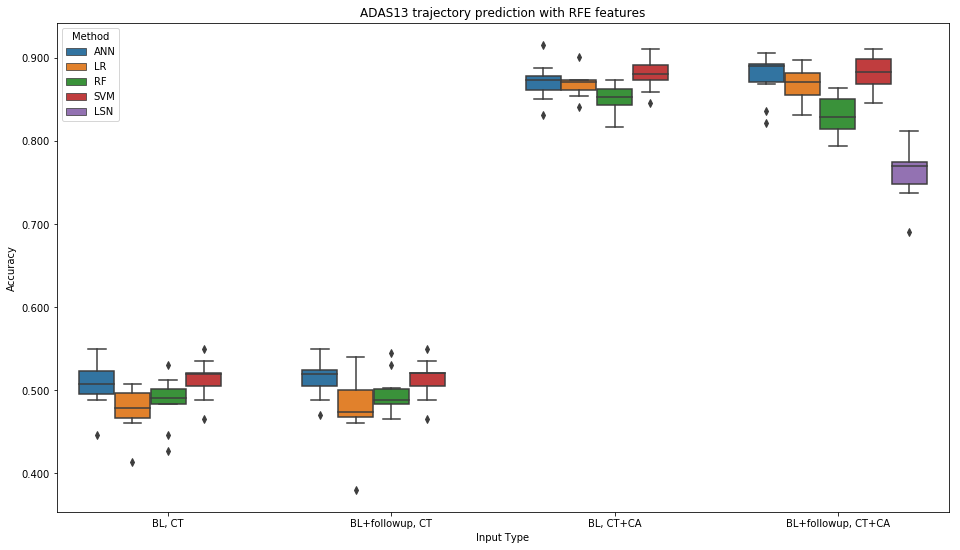

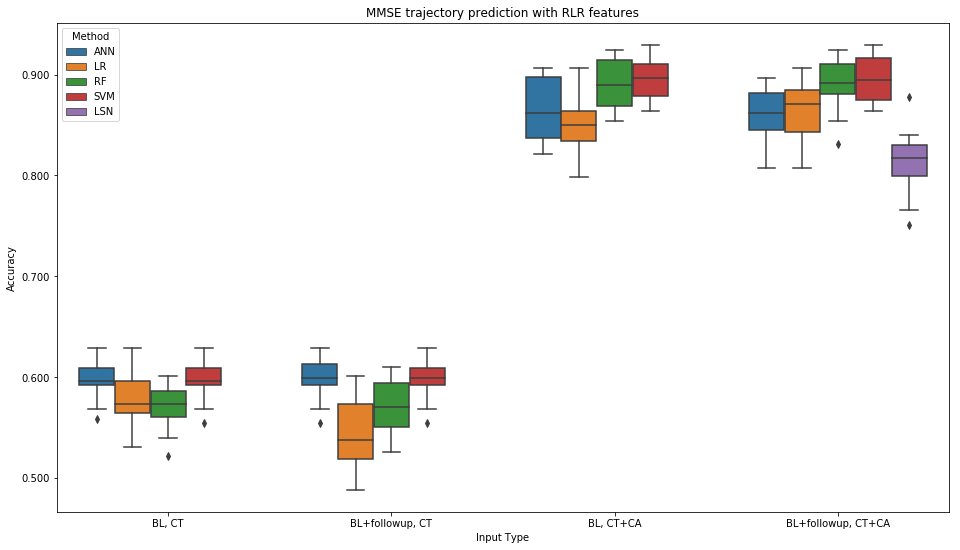

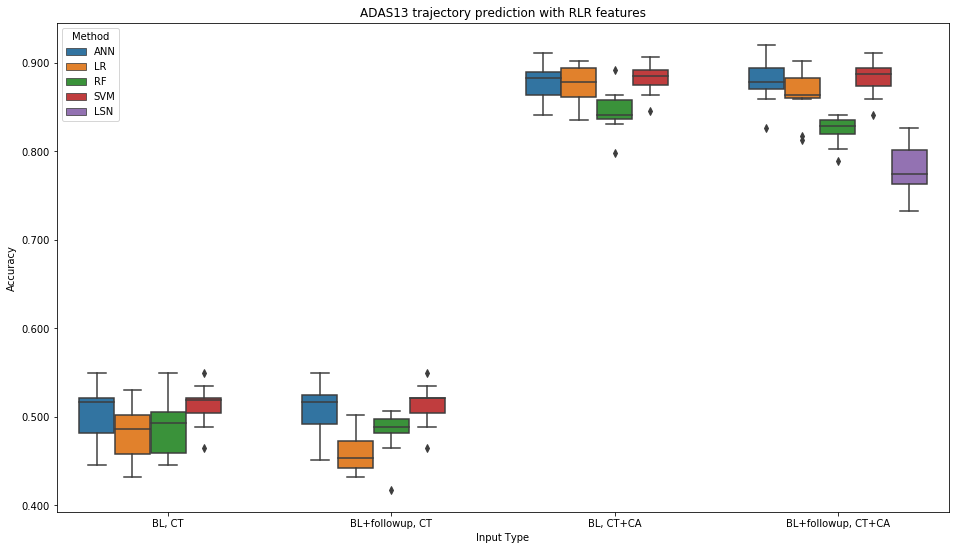

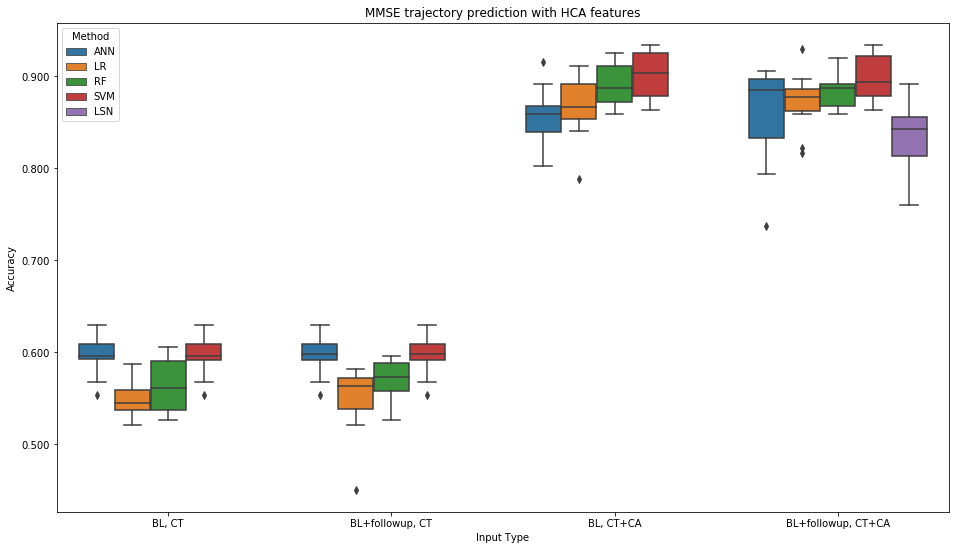

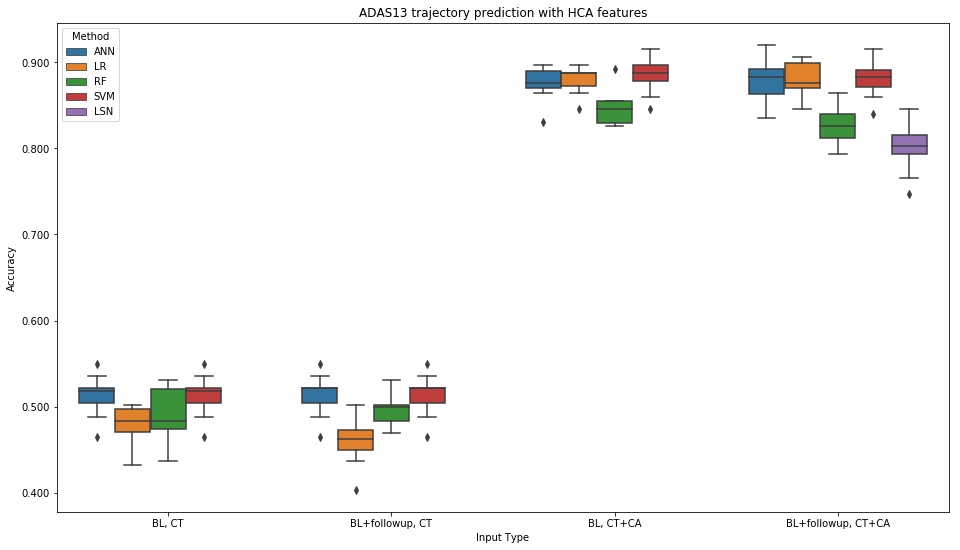

In [2]:
# Experiment Feb26 with 4 feature selection methods
df = pd.read_csv("results/model_performance.csv")
choices = ["BL, CT", "BL+followup, CT", "BL, CT+CA","BL+followup, CT+CA"]

# Reformat the obtained results
new_df = pd.DataFrame()
for index, row in df.iterrows():
    if row["Method"] != "LSN" and row["NoClinical"] != "OnlyClinical":
        if row["NoClinical"] == "True" and row["NoFollowup"]:
            condition = "BL, CT"
        elif row["NoClinical"] == "True":
            condition = "BL+followup, CT"
        elif row["NoFollowup"]:
            condition = "BL, CT+CA"
        else:
            condition = "BL+followup, CT+CA"
        method = row["Method"]
        featuretype = row["FeatureType"]
        trajectory = row["Trajectory"]
        
        for i in range(10):
            accuracy = row["Accuracy{}".format(i)]
            new_row = {"Accuracy": accuracy, 
                       "Method": method,
                       "Input Type": condition,
                       "FeatureType": featuretype,
                       "Trajectory": trajectory}
            new_df = new_df.append(new_row, ignore_index=True)

# Append the results with the LSN method
for index, row in df.iterrows():
    if row["Method"] == "LSN":
        condition = "BL+followup, CT+CA"
        method = row["Method"]
        featuretype = row["FeatureType"]
        trajectory = row["Trajectory"]
        
        for i in range(10):
            accuracy = row["Accuracy{}".format(i)]
            new_row = {"Accuracy": accuracy, 
                       "Method": method,
                       "Input Type": condition,
                       "FeatureType": featuretype,
                       "Trajectory": trajectory}
            new_df = new_df.append(new_row, ignore_index=True)
            
# Append the results with clinical attributes only
for index, row in df.iterrows():
    if row["NoClinical"] == "OnlyClinical":
        if row["NoFollowup"]:
            condition = "BL, CA"
        else:
            condition = "BL+followup, CA"
        method = row["Method"]
        featuretype = row["FeatureType"]
        trajectory = row["Trajectory"]
        
        for i in range(10):
            accuracy = row["Accuracy{}".format(i)]
            new_row = {"Accuracy": accuracy, 
                       "Method": method,
                       "Input Type": condition,
                       "FeatureType": featuretype,
                       "Trajectory": trajectory}
            new_df = new_df.append(new_row, ignore_index=True)

# Look through the experimental conditions
for f in ["AAL", "PCA", "RFE", "RLR", "HCA"]:
    for t in ["MMSE", "ADAS13"]:
        plt.figure(figsize=(16,9))
        cur_df = new_df.loc[(new_df["Trajectory"] == t) & (new_df["FeatureType"] == f)]
        ax = sns.boxplot(x="Input Type", y="Accuracy", hue="Method", data=cur_df, order=choices)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        plt.title("{} trajectory prediction with {} features".format(t, f))
        plt.savefig("plots/Exp_Feb26_{}_{}_acc_boxplot.png".format(t, f))

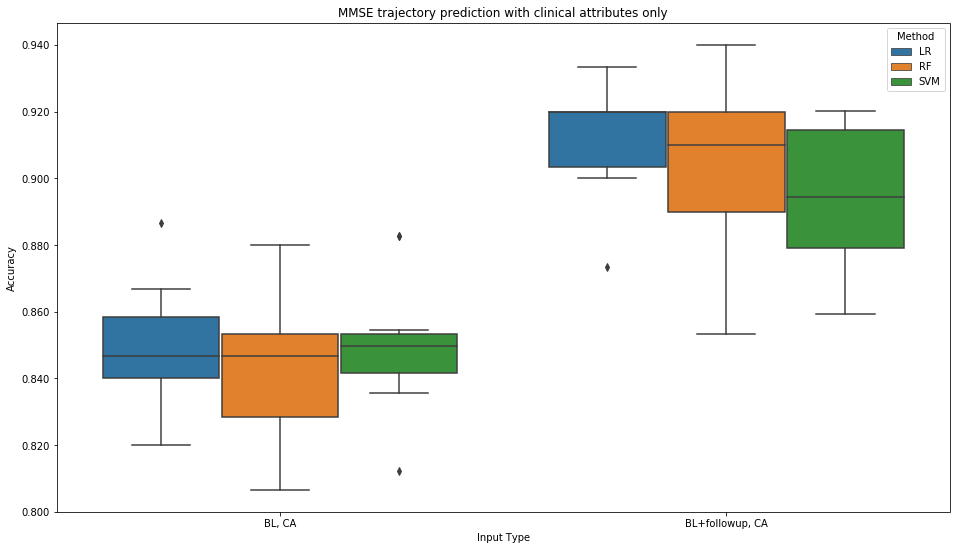

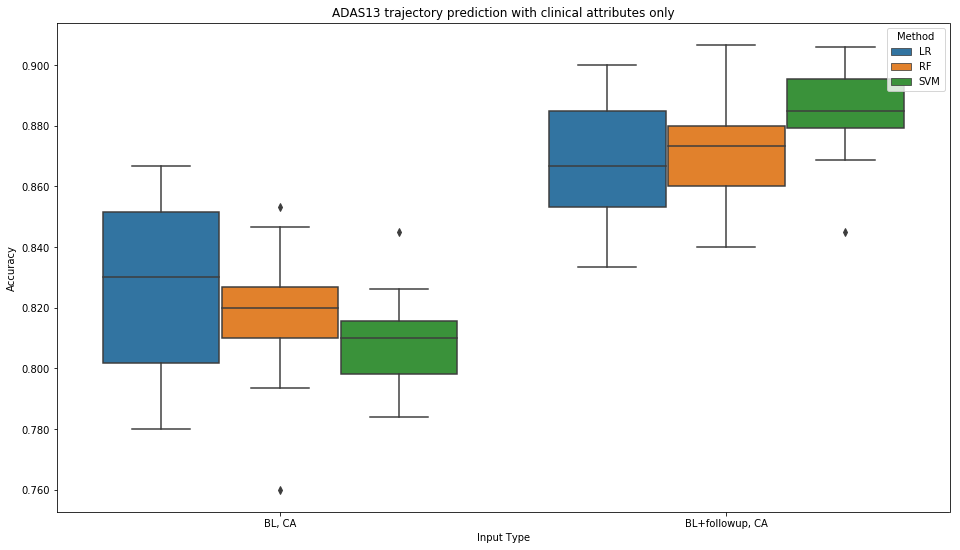

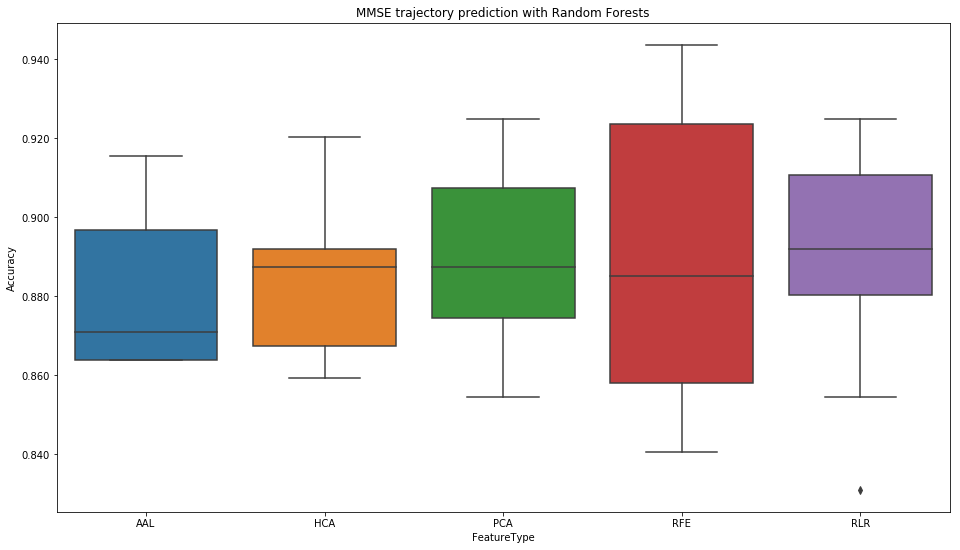

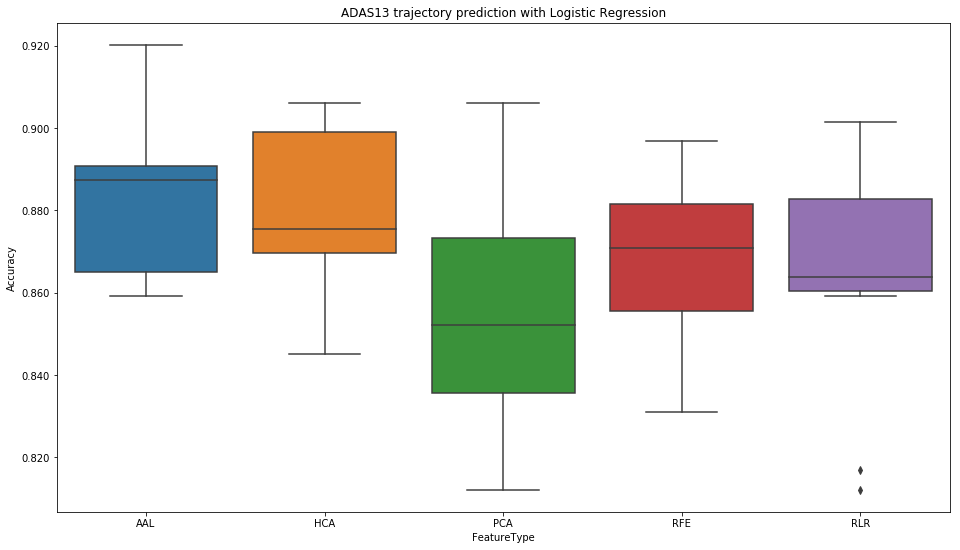

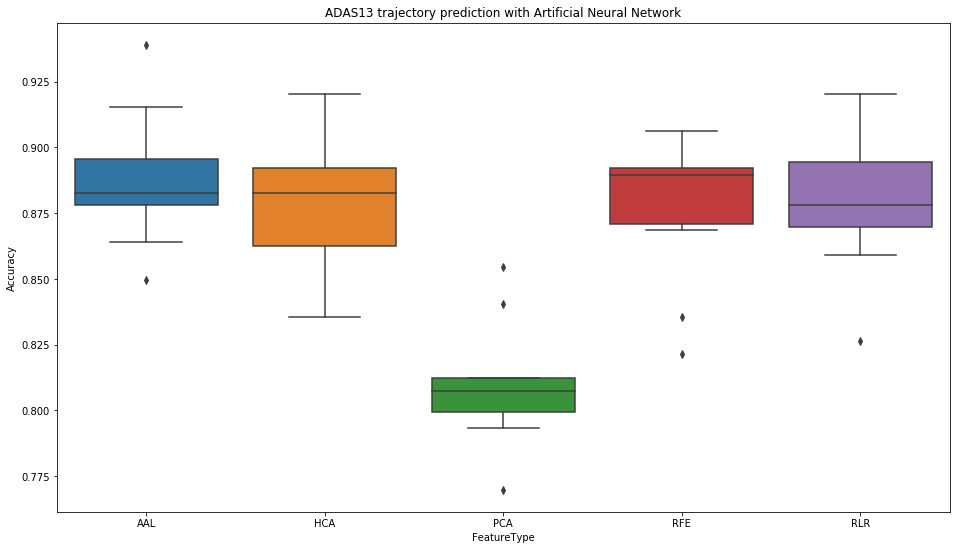

In [3]:
# Plot the results with clinical attributes only
for t in ["MMSE", "ADAS13"]:
    plt.figure(figsize=(16,9))
    cur_df = new_df.loc[(new_df["Trajectory"] == t) & (new_df["FeatureType"] == "None")]
    ax = sns.boxplot(x="Input Type", y="Accuracy", hue="Method", data=cur_df, 
                     order=["BL, CA", "BL+followup, CA"])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    plt.title("{} trajectory prediction with clinical attributes only".format(t))
    plt.savefig("plots/Exp_Feb26_{}_CA-only_acc_boxplot.png".format(t))
    
# Plot the RF results for MMSE trajectory prediction
plt.figure(figsize=(16,9))
cur_df = new_df.loc[(new_df["Trajectory"] == "MMSE") & (new_df["Method"] == "RF") & 
                    (new_df["Input Type"] == "BL+followup, CT+CA")]
ax = sns.boxplot(x="FeatureType", y="Accuracy", data=cur_df)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.title("MMSE trajectory prediction with Random Forests")
plt.savefig("plots/Exp_Feb26_MMSE_RF_best_method.png")

# Plot the LR results for ADAS13 trajectory prediction
plt.figure(figsize=(16,9))
cur_df = new_df.loc[(new_df["Trajectory"] == "ADAS13") & (new_df["Method"] == "LR") & 
                    (new_df["Input Type"] == "BL+followup, CT+CA")]
ax = sns.boxplot(x="FeatureType", y="Accuracy", data=cur_df)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.title("ADAS13 trajectory prediction with Logistic Regression")
plt.savefig("plots/Exp_Feb26_ADAS13_LR_best_method.png")

# Plot the ANN results for ADAS13 trajectory prediction
plt.figure(figsize=(16,9))
cur_df = new_df.loc[(new_df["Trajectory"] == "ADAS13") & (new_df["Method"] == "ANN") & 
                    (new_df["Input Type"] == "BL+followup, CT+CA")]
ax = sns.boxplot(x="FeatureType", y="Accuracy", data=cur_df)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.title("ADAS13 trajectory prediction with Artificial Neural Network")
plt.savefig("plots/Exp_Feb26_ADAS13_ANN_best_method.png")

In [ ]:
# Nikhil example code to plot the results
plt.figure(figsize=(16,9))
plt.style.use('seaborn-white')
sns.set(font_scale=2)
train_loss = train_metrics['train_loss']
valid_loss = train_metrics['valid_loss']
train_acc = train_metrics['train_acc']
valid_acc = train_metrics['valid_acc']

plt.subplot(2,2,1)
plt.plot(train_loss,label='train');
plt.plot(valid_loss,label='valid');
plt.title('Loss (innerloop)')
plt.xlabel('number of epoch x{}'.format(validate_after))
plt.legend()

plt.subplot(2,2,2)
plt.plot(train_acc,label='train');
plt.plot(valid_acc,label='valid');
plt.plot(np.tile(test_metrics['test_acc'],len(train_acc)),'--',label='test')
plt.title('Acc')
plt.xlabel('number of epoch x{}'.format(validate_after))
plt.legend()